# Customer Feedback Analysis of Highfield Twitter Account

 Tweet messages directed at Highfield Account were retrived and analyzed to determined the Twitter 
 users reactions if they are positive or negative.  Topical Words were identified and map visualizations(using GPS cordinates) was used to show Twitter users locations. 'askhighfield' was used as the query string to search the Tweets.

In [4]:
import tweepy   #Twitter API Streamlistner package
import preprocessor as p

In [5]:
from tweetmethods import get_API,twoplus2,get_tweet_content,get_tweet_sentiment,get_geocodes,ukMap,show_WordCloud,cleanTwits

In [6]:
api = get_API() # Oauth Handler

In [7]:
search_key='askhighfield'

In [10]:
cursor=tweepy.Cursor(api.search,search_key,count=200,tweet_mode='extended')

# Connecting to Twitter to retrieve Tweets. 

Total no of 35 Tweets were returned as shown below.

In [11]:
tweets=get_tweet_content(cursor)

In [44]:
tweets[0]

{'Name': 'Emma',
 'Twitter_handle': 'ederner',
 'text': 'Exams sorry',
 'location': 'Nottingham',
 'Time_Created': '2020-08-20 03:12:21 PM',
 'sentiment': 'Negative',
 'latitude': 52.9534161,
 'longitude': -1.1492773}

In [16]:
tweets[1]

{'Name': 'Emma',
 'Twitter_handle': 'ederner',
 'text': "@askhighfield Took my ex in may, I STILL don't have my certificates. It's all well and done digitising everything but it shouldn't take three months to print out and post certificates",
 'location': 'Nottingham',
 'Time_Created': '2020-08-20 03:12:02 PM'}

In [17]:
tweets[33]

{'Name': 'Emma',
 'Twitter_handle': 'ederner',
 'text': "@askhighfield hi. I passed my exams in April, got the results mid may. Level 3 business Admin. I'm still waiting for my certificates. Can you please advise as to how long it will be before I recieved them? 4 Months is a ridiculous amount of time to wait pandemic or not.",
 'location': 'Nottingham',
 'Time_Created': '2020-08-13 08:59:17 AM'}

In [18]:
dataFrame=pd.DataFrame(tweets) # Converting list to Dataframes

In [19]:
dataFrame.head() # Top 5 of Daataframe

,Name,Twitter_handle,text,location,Time_Created
0,Emma,ederner,@askhighfield Exams sorry,Nottingham,2020-08-20 03:12:21 PM
1,Emma,ederner,"@askhighfield Took my ex in may, I STILL don't...",Nottingham,2020-08-20 03:12:02 PM
2,Highfield,askhighfield,Vocational and Technical Qualifications – Resu...,"Doncaster, South Yorkshire, UK",2020-08-20 03:00:28 PM
3,Highfield,askhighfield,Have your own specific content and resources f...,"Doncaster, South Yorkshire, UK",2020-08-20 01:34:55 PM
4,Sapphire Malcolm,malcolm34341,@CafeLeep @Leep1leeds @daznixon1989 @Connectin...,"Leeds, England",2020-08-18 01:02:28 PM


In [20]:
dataFrame.tail() #bottom of Dataframe

,Name,Twitter_handle,text,location,Time_Created
31,Sapphire Malcolm,malcolm34341,@CafeLeep @GetKahoot @Leep1leeds @leedslibrari...,"Leeds, England",2020-08-14 12:03:43 PM
32,Health and Safety,hstukcom,To ensure everyone present on your site is ful...,North East England,2020-08-13 09:30:22 AM
33,Emma,ederner,"@askhighfield hi. I passed my exams in April, ...",Nottingham,2020-08-13 08:59:17 AM
34,Andy Constantine,HighfieldAndy,@TallPaulTurner @TheNigelAdkins @askhighfield ...,Doncaster,2020-08-13 08:33:07 AM
35,Paul Turner,TallPaulTurner,Starting the day with @TheNigelAdkins inspired...,"Beverley, England",2020-08-13 07:12:04 AM


# Cleaning the Tweets

In [21]:
tweets=cleanTwits(tweets)

In [22]:
dataFrame1=pd.DataFrame(tweets)

In [23]:
dataFrame1.head() #Displaying the cleaned Tweets

,Name,Twitter_handle,text,location,Time_Created
0,Emma,ederner,Exams sorry,Nottingham,2020-08-20 03:12:21 PM
1,Emma,ederner,Took my ex in may I STILL don t have my certif...,Nottingham,2020-08-20 03:12:02 PM
2,Highfield,askhighfield,Vocational and Technical Qualifications Result...,"Doncaster, South Yorkshire, UK",2020-08-20 03:00:28 PM
3,Highfield,askhighfield,Have your own specific content and resources f...,"Doncaster, South Yorkshire, UK",2020-08-20 01:34:55 PM
4,Sapphire Malcolm,malcolm34341,on the i Not sure there any easy read any chance,"Leeds, England",2020-08-18 01:02:28 PM


In [ ]:
#dataFrame3['location'][33]='Nottingham'

# Finding the sentiment expressed in a Tweet

In [24]:
tweets=get_tweet_sentiment(tweets)

In [25]:
dataFrame2=pd.DataFrame(tweets)

In [26]:
dataFrame2.head()   # Showing Tweets sentiment as Positive, Neutral or Negative comments about Highfield

,Name,Twitter_handle,text,location,Time_Created,sentiment
0,Emma,ederner,Exams sorry,Nottingham,2020-08-20 03:12:21 PM,Negative
1,Emma,ederner,Took my ex in may I STILL don t have my certif...,Nottingham,2020-08-20 03:12:02 PM,Neutral
2,Highfield,askhighfield,Vocational and Technical Qualifications Result...,"Doncaster, South Yorkshire, UK",2020-08-20 03:00:28 PM,Positive
3,Highfield,askhighfield,Have your own specific content and resources f...,"Doncaster, South Yorkshire, UK",2020-08-20 01:34:55 PM,Positive
4,Sapphire Malcolm,malcolm34341,on the i Not sure there any easy read any chance,"Leeds, England",2020-08-18 01:02:28 PM,Positive


# # Obtain the GPS coordinates of Twitter User to establish Twitter user location

In [27]:
get_geocodes(tweets)

Getting coordinates for tweet locations...
Done geocoding


In [28]:
dataFrame3=pd.DataFrame(tweets)

In [29]:
dataFrame3.head()

,Name,Twitter_handle,text,location,Time_Created,sentiment,latitude,longitude
0,Emma,ederner,Exams sorry,Nottingham,2020-08-20 03:12:21 PM,Negative,52.953416,-1.149277
1,Emma,ederner,Took my ex in may I STILL don t have my certif...,Nottingham,2020-08-20 03:12:02 PM,Neutral,52.953416,-1.149277
2,Highfield,askhighfield,Vocational and Technical Qualifications Result...,"Doncaster, South Yorkshire, UK",2020-08-20 03:00:28 PM,Positive,53.522768,-1.133531
3,Highfield,askhighfield,Have your own specific content and resources f...,"Doncaster, South Yorkshire, UK",2020-08-20 01:34:55 PM,Positive,53.522768,-1.133531
4,Sapphire Malcolm,malcolm34341,on the i Not sure there any easy read any chance,"Leeds, England",2020-08-18 01:02:28 PM,Positive,53.797418,-1.543794


# # Method to fit the Tweets on map to show Twitter users location

In [ ]:
tweets[0]

In [45]:
ukMap(tweets)

In [32]:
from IPython.display import IFrame
IFrame(src="./tweet_map.html/", width=600,height=700)

# Method to show topical words discussed about Highfield

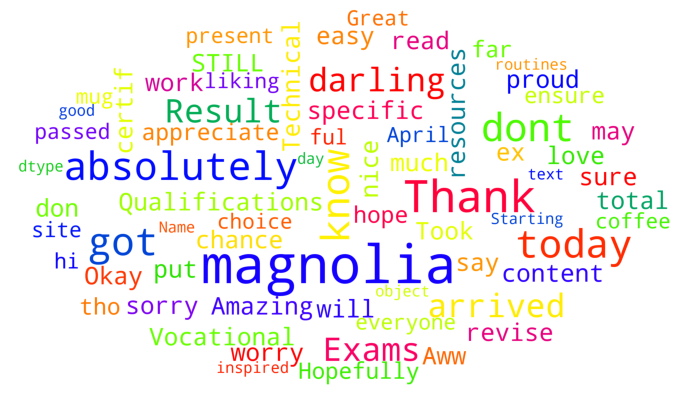

In [33]:
show_WordCloud(tweets)

# Streaming Tweets to Atlas Mongo Cloud Database

In [34]:
from pymongo import MongoClient

In [35]:
atlas_client = MongoClient(keys.mongo_connection_string)

In [36]:
dbase = atlas_client.highfieldtweets

In [37]:
from tweetlistener import TweetListener

Successfully connected to Twitter



In [38]:
tweet_limit=10

In [39]:
twitter_stream=tweepy.Stream(api.auth,TweetListener(api,dbase,tweet_limit))

In [40]:
twitter_stream.filter(follow=["297865638"],is_async=True)

In [41]:
dbase.tweets.create_index([('$**', 'text')])

'$**_text'

In [42]:
Twits=dbase.tweets.count_documents({"$text": {"$search": "297865638"}})

In [43]:
Twits

4